# Using Matplotlib

## Stylesheets

The following code prints out all the available stylesheets that change the overall look of Matplotlib plots. Feel free to uncomment the last line and try out different styles.

In [10]:
import matplotlib.style
import matplotlib as mpl
import matplotlib.pyplot as plt

print(plt.style.available)

mpl.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


## Histogram

Here is a simple histogram. 

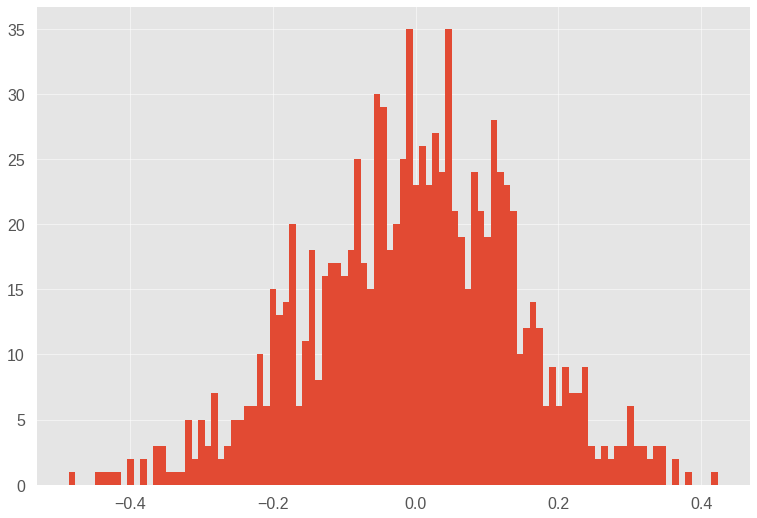

In [18]:
import numpy as np
import matplotlib.pyplot as plt

mean = 0
std_dev = 0.15
data = np.random.normal(mean, std_dev, 1000)

plt.hist(data, bins=100)
plt.show()

## Scipy functions

A number of useful mathematical functions are available through the scipy packages.
We will just show one example here, to sample from a $\chi^2$ distribution

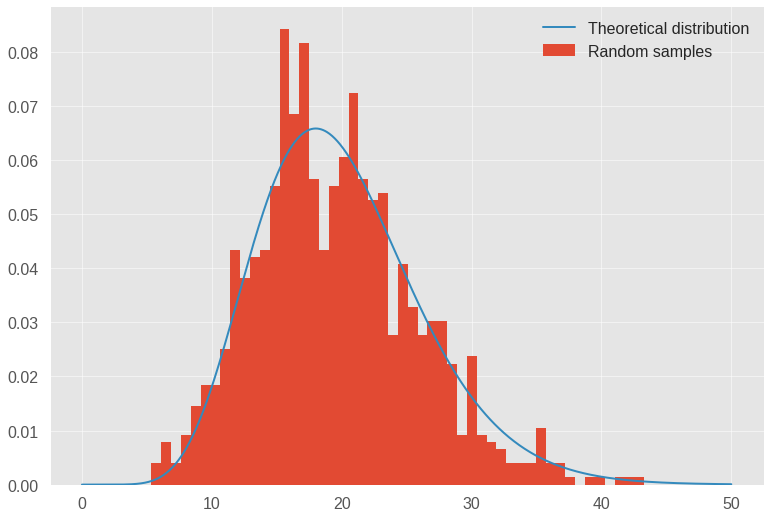

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

mean = 0
std_dev = 0.15
data = chi2.rvs(20, size=1000)

# let's use numpy to generate a range of numbers:
x = np.linspace(0,50, num=1000)
# then get the chi2 probability distribution:
chi2_pdf = chi2.pdf(x, 20)

plt.hist(data, bins=50, density=True)
plt.plot(x, chi2_pdf)
plt.legend(["Theoretical distribution", "Random samples", ])
plt.show()

## Box plot and violin plot

Here is a simple box plot depicting random data with a skewed distribution followed by a violin plot of the same data. Both use the default setting. I have seen better box and violin plots than these plotted using Matplotlib and (more particularly) using the Seaborn library that crops up in the Data Science module. If you have the time and inclination, feel free to explore alterative ways of drawing these plots. 

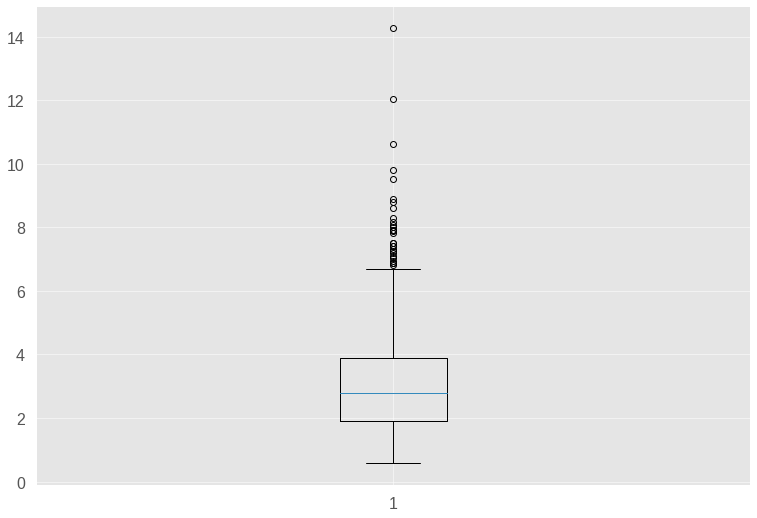

In [27]:
import numpy as np
import matplotlib.pyplot as plt

data = np.random.lognormal(1, 0.5, 1000)

plt.boxplot(data) 
plt.show()

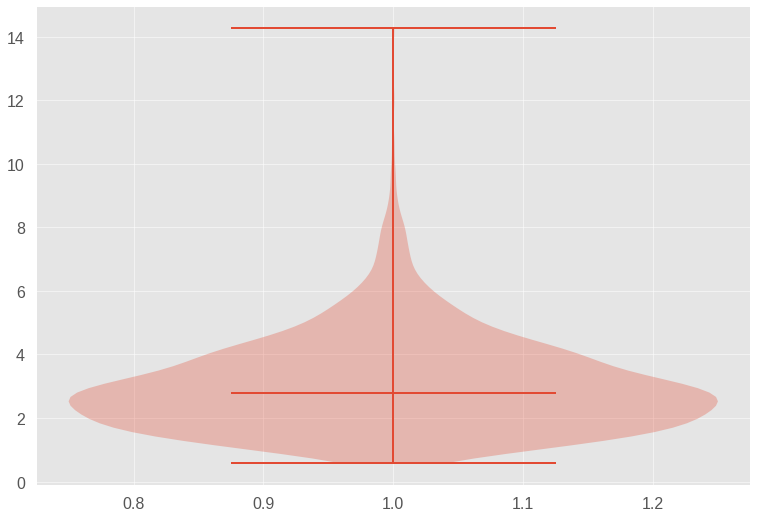

In [28]:
plt.violinplot(data, showmedians=True) 
plt.show()

# Some styling

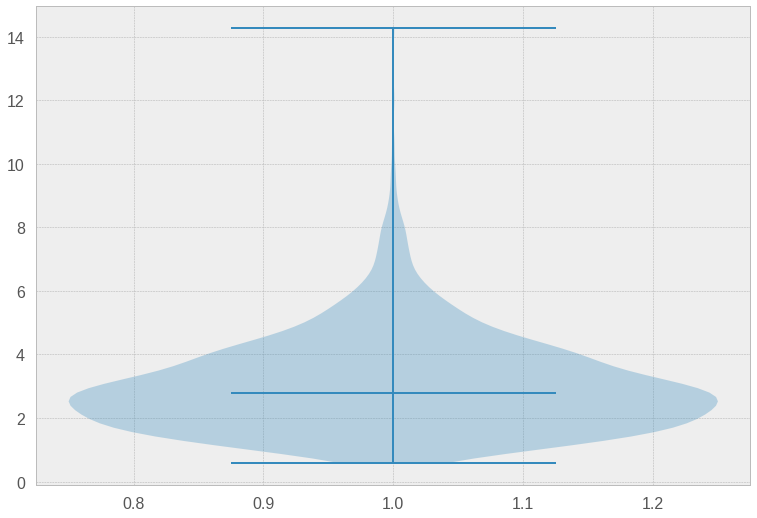

In [29]:
with plt.style.context("bmh"):
    plt.violinplot(data, showmedians=True) 
    plt.show()

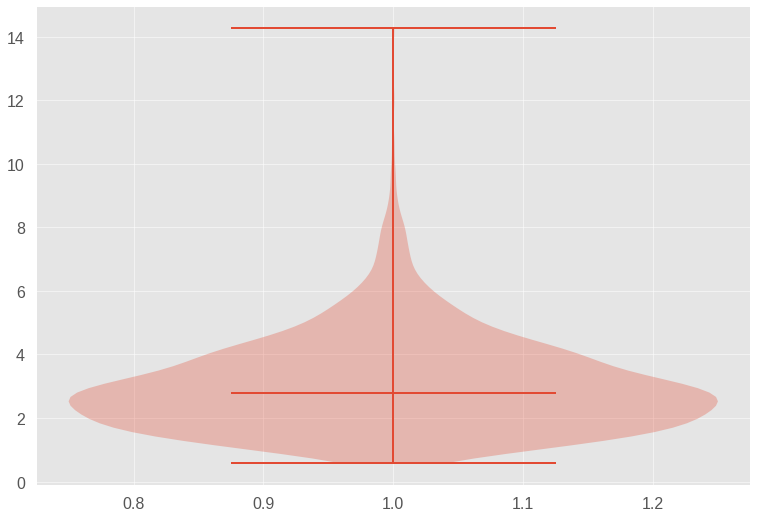

In [30]:
plt.style.use("ggplot")
plt.violinplot(data, showmedians=True) 
plt.show()

## Refining a pie chart

We start with a simple pie chart:

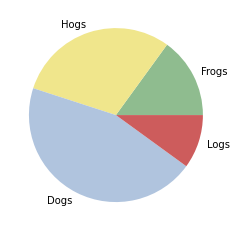

In [5]:
import matplotlib.pyplot as plt

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
percentages = [15, 30, 45, 10]
colours = [ 'darkseagreen', 'khaki', 'lightsteelblue',  
            'indianred' ]

plt.pie(percentages, labels=labels, colors=colours)
plt.show()

Here is a refined and improved pie chart &mdash; see if you can work out what each of the new parameters do:

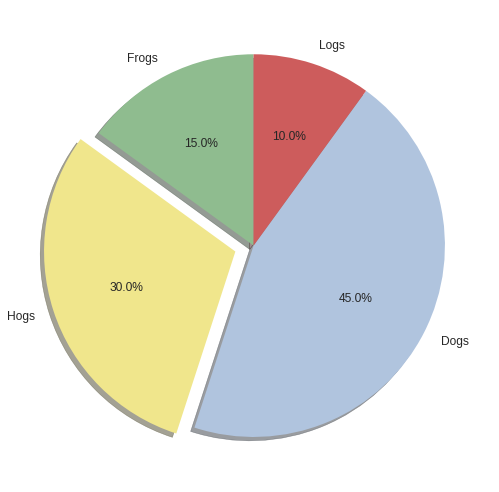

In [37]:
import matplotlib.pyplot as plt

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
percentages = [15, 30, 45, 10]
colours = [ 'darkseagreen', 'khaki', 'lightsteelblue',  
            'indianred' ]

explode = (0, 0.1, 0, 0) # degree to which each section is pulled out from the pie
plt.pie(percentages, 
        labels=labels, 
        colors=colours,
        explode=explode,
        autopct='%1.1f%%', # adds percentages to pie sections
        textprops={'fontsize': 12}, #changes label and percentage font size
        shadow=True, # adds drop shadow to pie
        startangle=90) # rotates pie

plt.show()

## Matplotlib examples

All these examples are taken from the Matplotlib website &mdash; all I did was select the ones that look interesting. Feel free to modify things to see what happens! And if you come up with something interesting, please let me know!

### statistics example code: `boxplot_vs_violin_demo.py`

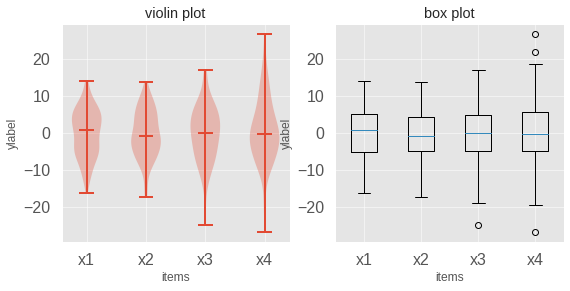

In [64]:
"""
===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))]) # sets offset/position of the x axis items on the plot
    ax.set_xlabel('items') # applies to both plots at once
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

### pylab_examples example code: `aspect_loglog.py`

This one is interesting because of the log scales on the *x* and *y* axes.

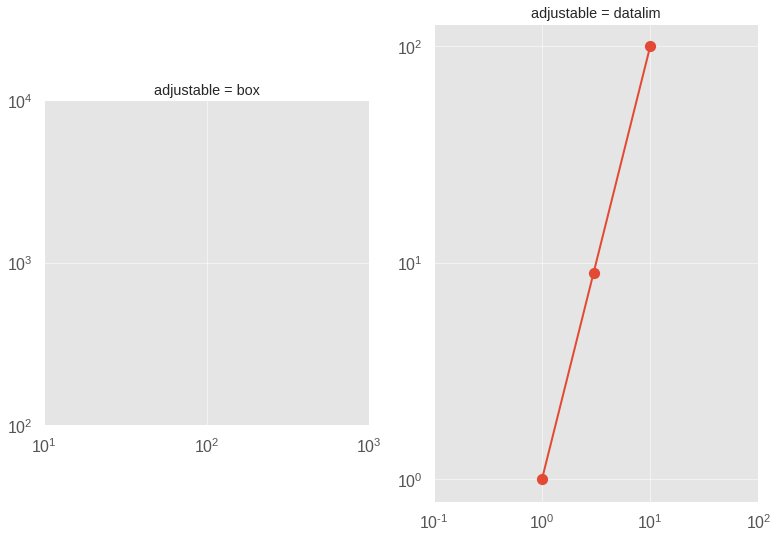

In [77]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(1e1, 1e3)
ax1.set_ylim(1e2, 1e4)
ax1.set_aspect(1)
ax1.set_title("adjustable = box")

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_adjustable("datalim")
ax2.plot([1, 3, 10], [1, 9, 100], "o-")
ax2.set_xlim(1e-1, 1e2)
ax2.set_ylim(1e-1, 1e3)
ax2.set_aspect(2)
ax2.set_title("adjustable = datalim")

plt.draw()
plt.show()

### mplot3d example code: `polys3d_demo.py`

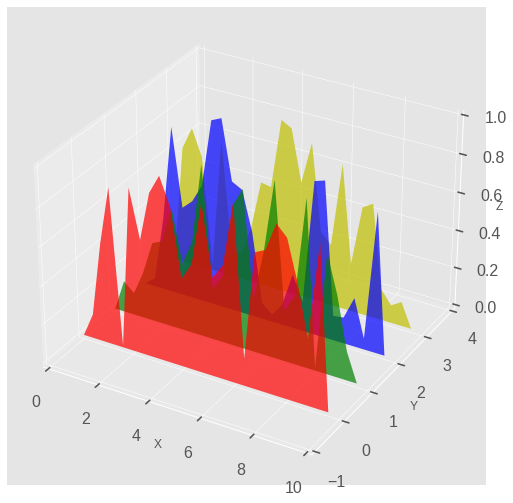

In [79]:
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()

### mplot3d example code: `surface3d_radial_demo.py`

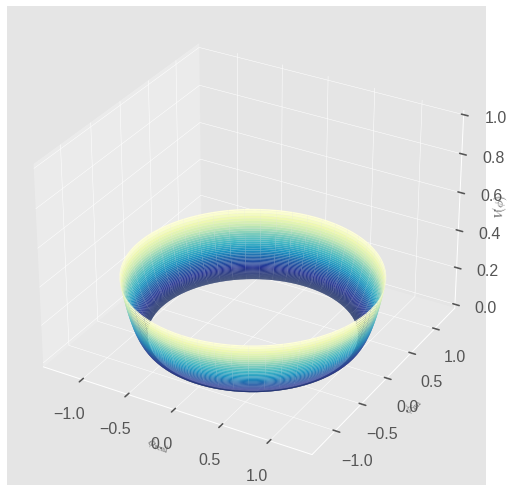

In [94]:
'''
=================================
3D surface with polar coordinates
=================================

Demonstrates plotting a surface defined in polar coordinates.
Uses the reversed version of the YlGnBu color map.
Also demonstrates writing axis labels with latex math mode.

Example contributed by Armin Moser.
'''

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(1, 1.25, 100)
p = np.linspace(0, 2*np.pi, 100)
R, P = np.meshgrid(r, p)
Z = ((R**2 - 1)**2)

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r)

# Tweak the limits and add latex math labels.
ax.set_zlim(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')

plt.show()

### Other examples

There are a large number of additional examples on the [Matplotlib site](https://matplotlib.org/examples/index.html).